In [2]:
import pandas as pd
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.info()
df.describe()

# Drop kolom tidak relevan seperti ID dan ZipCode
df = df.drop(columns=["ID", "ZIP Code"])

# Tangani missing value (jika ada)
df = df.dropna()

# Normalisasi
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Personal Loan'])  # fitur tanpa label
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


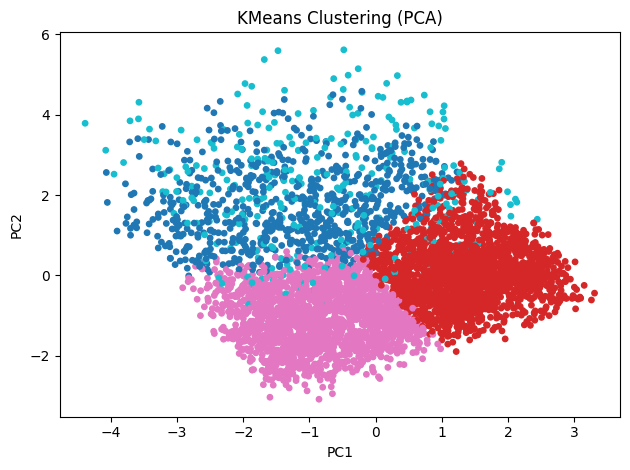

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  # <-- WAJIB agar plt dikenali

# Load dan preprocessing data
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.drop(columns=["ID", "ZIP Code"], inplace=True)
df = df.dropna()
X = df.drop(columns=["Personal Loan"])
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualisasi PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=15)
plt.title("KMeans Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("kmeans_visualisasi.png")
plt.show()


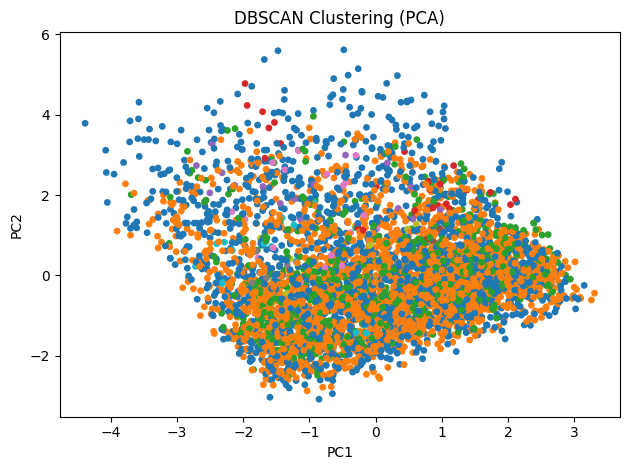

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dan preprocessing data
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.drop(columns=["ID", "ZIP Code"], inplace=True)
df = df.dropna()
X = df.drop(columns=["Personal Loan"])
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Visualisasi PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=15)
plt.title("DBSCAN Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("dbscan_visualisasi.png")
plt.show()


In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate(labels, X):
    if len(set(labels)) > 1:
        print("Silhouette Score:", silhouette_score(X, labels))
        print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels))
        print("Davies-Bouldin Index:", davies_bouldin_score(X, labels))
    else:
        print("Tidak bisa dievaluasi (hanya satu cluster ditemukan)")

evaluate(kmeans_labels, X_scaled)
evaluate(dbscan_labels, X_scaled)


Silhouette Score: 0.16526331868783914
Calinski-Harabasz Index: 799.9201017406041
Davies-Bouldin Index: 1.7742357092308727
Silhouette Score: 0.0991524787260911
Calinski-Harabasz Index: 117.96293794289387
Davies-Bouldin Index: 1.5736474853853997


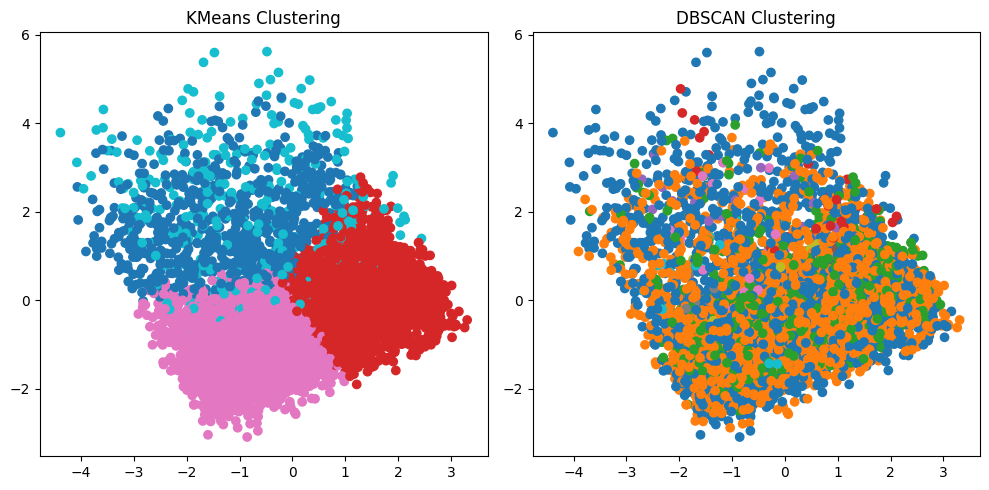

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10')
plt.title("KMeans Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.savefig("hasil_clustering.png")
plt.show()
